[View in Colaboratory](https://colab.research.google.com/github/Santosh-Gupta/Book2Vec/blob/master/Book2VecIndividualBookMaps.ipynb)

In [11]:
import re
from collections import Counter
import time

import numpy as np
import tensorflow as tf
    
%matplotlib inline
from __future__ import print_function
import collections
import math
import numpy as np
import pandas as pd
import os
import random
import tensorflow as tf
import zipfile
from matplotlib import pyplot
from six.moves import range
from six.moves.urllib.request import urlretrieve
!pip install pillow #in order to save plots as jpg
!pip uninstall adjustText 

from sklearn.manifold import TSNE

#!pip install MulticoreTSNE
#from MulticoreTSNE import MulticoreTSNE as TSNE

from urllib.request import urlretrieve
from os.path import isfile, isdir
import zipfile

import keras

!pip install -U -q PyDrive

from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import zipfile
import os
import sys

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [12]:
zip_id = input("Enter Gdrive file ID for tensorflow models: ") 
      
if not os.path.exists('MODEL'):
    os.makedirs('MODEL')

# DOWNLOAD ZIP
print ("Downloading zip file")
myzip = drive.CreateFile({'id': zip_id})
myzip.GetContentFile('model.zip')

# UNZIP ZIP
print ("Uncompressing zip file")
zip_ref = zipfile.ZipFile('model.zip', 'r')
zip_ref.extractall('MODEL/')
zip_ref.close()

print( os.getcwd() )
print( os.listdir('./MODEL') )

Enter Gdrive file ID for tensorflow models: 1fe5WTpjAaoKivd2XA1hvU0TmVXTkwGK3
Uncompressing zip file
/content
['bookVec.ckpt.data-00000-of-00001', 'bookVec.ckpt.meta', 'bookVec.ckpt.index', 'checkpoint']


In [13]:
dl_id = input("Enter Gdrive file ID for books: ") 

# DOWNLOAD ZIP
print ("Downloading  file")
myzip = drive.CreateFile({'id': dl_id})
myzip.GetContentFile('books.csv')

b = pd.read_csv( 'books.csv' )
b.head(30)
bookDictionary = b.set_index('book_id').to_dict()['title']
bookDictionary[5]
AuthorDictionary = b.set_index('book_id').to_dict()['authors']

Enter Gdrive file ID for books: 1w3uSNtc1srNaWoRHwbUE9o3baokloh9U


In [14]:
with tf.Session() as sess:
  saver = tf.train.import_meta_graph('./MODEL/bookVec.ckpt.meta')
  saver.restore(sess, './MODEL/bookVec.ckpt' )

  embeddings = tf.get_default_graph().get_tensor_by_name('embeddings:0') 
  softmax_weights = tf.get_default_graph().get_tensor_by_name('softmax_weights:0') 
  
  normSM = tf.sqrt(tf.reduce_sum(tf.square(softmax_weights), 1, keepdims=True))
  normalized_embeddingsSM = softmax_weights / normSM
  
  norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keepdims=True))
  normalized_embeddings = embeddings / norm
  
  final_embeddings = normalized_embeddings.eval()
  final_embeddingsSM = normalized_embeddingsSM.eval()

INFO:tensorflow:Restoring parameters from ./MODEL/bookVec.ckpt


In [5]:
authorPhrase = 'Tolle'
lines = []
for i in AuthorDictionary:
  if type(AuthorDictionary[i]) is str:
    if authorPhrase in AuthorDictionary[i] :
        lines.append(i)
print(lines)
for j in lines:
  print(bookDictionary[j], AuthorDictionary[j]  )

[719, 744, 2694]
A New Earth: Awakening to Your Life's Purpose Eckhart Tolle
The Power of Now: A Guide to Spiritual Enlightenment Eckhart Tolle
Practicing the Power of Now: Essential Teachings, Meditations, and Exercises from the Power of Now Eckhart Tolle


In [25]:
searchPhrase = 'A Clash of Kings'
lines = []
for i in bookDictionary:
  if type(bookDictionary[i]) is str:
    if searchPhrase in bookDictionary[i] :
        lines.append(i)
print(lines)
for j in lines:
  print(bookDictionary[j], AuthorDictionary[j]  )
  


[110, 3775]
A Clash of Kings  (A Song of Ice and Fire, #2) George R.R. Martin
A Game of Thrones / A Clash of Kings (A Song of Ice and Fire, #1-2) George R.R. Martin


In [26]:
NumberOfBooks = 500

extracted_v = np.take(final_embeddings, 110, axis=0)   #The 2nd input is the Book ID
dotprods_v = np.matmul(extracted_v, np.transpose(final_embeddings))

nearestBooks = (-dotprods_v).argsort()[0:NumberOfBooks]


for k in range(0, 10):
  print(bookDictionary[nearestBooks[k]], AuthorDictionary[nearestBooks[k]])

A Clash of Kings  (A Song of Ice and Fire, #2) George R.R. Martin
A Dance with Dragons (A Song of Ice and Fire, #5) George R.R. Martin
A Feast for Crows (A Song of Ice and Fire, #4) George R.R. Martin
A Storm of Swords (A Song of Ice and Fire, #3) George R.R. Martin
A Storm of Swords: Blood and Gold (A Song of Ice and Fire, #3: Part 2 of 2) George R.R. Martin
A Game of Thrones (A Song of Ice and Fire, #1) George R.R. Martin
A Storm of Swords: Steel and Snow (A Song of Ice and Fire, #3: Part 1 of 2) George R.R. Martin
The Name of the Wind (The Kingkiller Chronicle, #1) Patrick Rothfuss
A Game of Thrones / A Clash of Kings (A Song of Ice and Fire, #1-2) George R.R. Martin
The Wise Man's Fear (The Kingkiller Chronicle, #2) Patrick Rothfuss


In [0]:
for_TSNE = np.take(final_embeddings, nearestBooks, axis=0) 

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')
two_d_embeddings = tsne.fit_transform(for_TSNE)

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#np.save('ClashKings.npy', two_d_embeddings)  #TNSE may take a lot of time, so may be helpful to save the variable
#uploadModel = drive.CreateFile()
#uploadModel.SetContentFile('ClashKings.npy')
#uploadModel.Upload()

step3
step4
step5
step6
step7


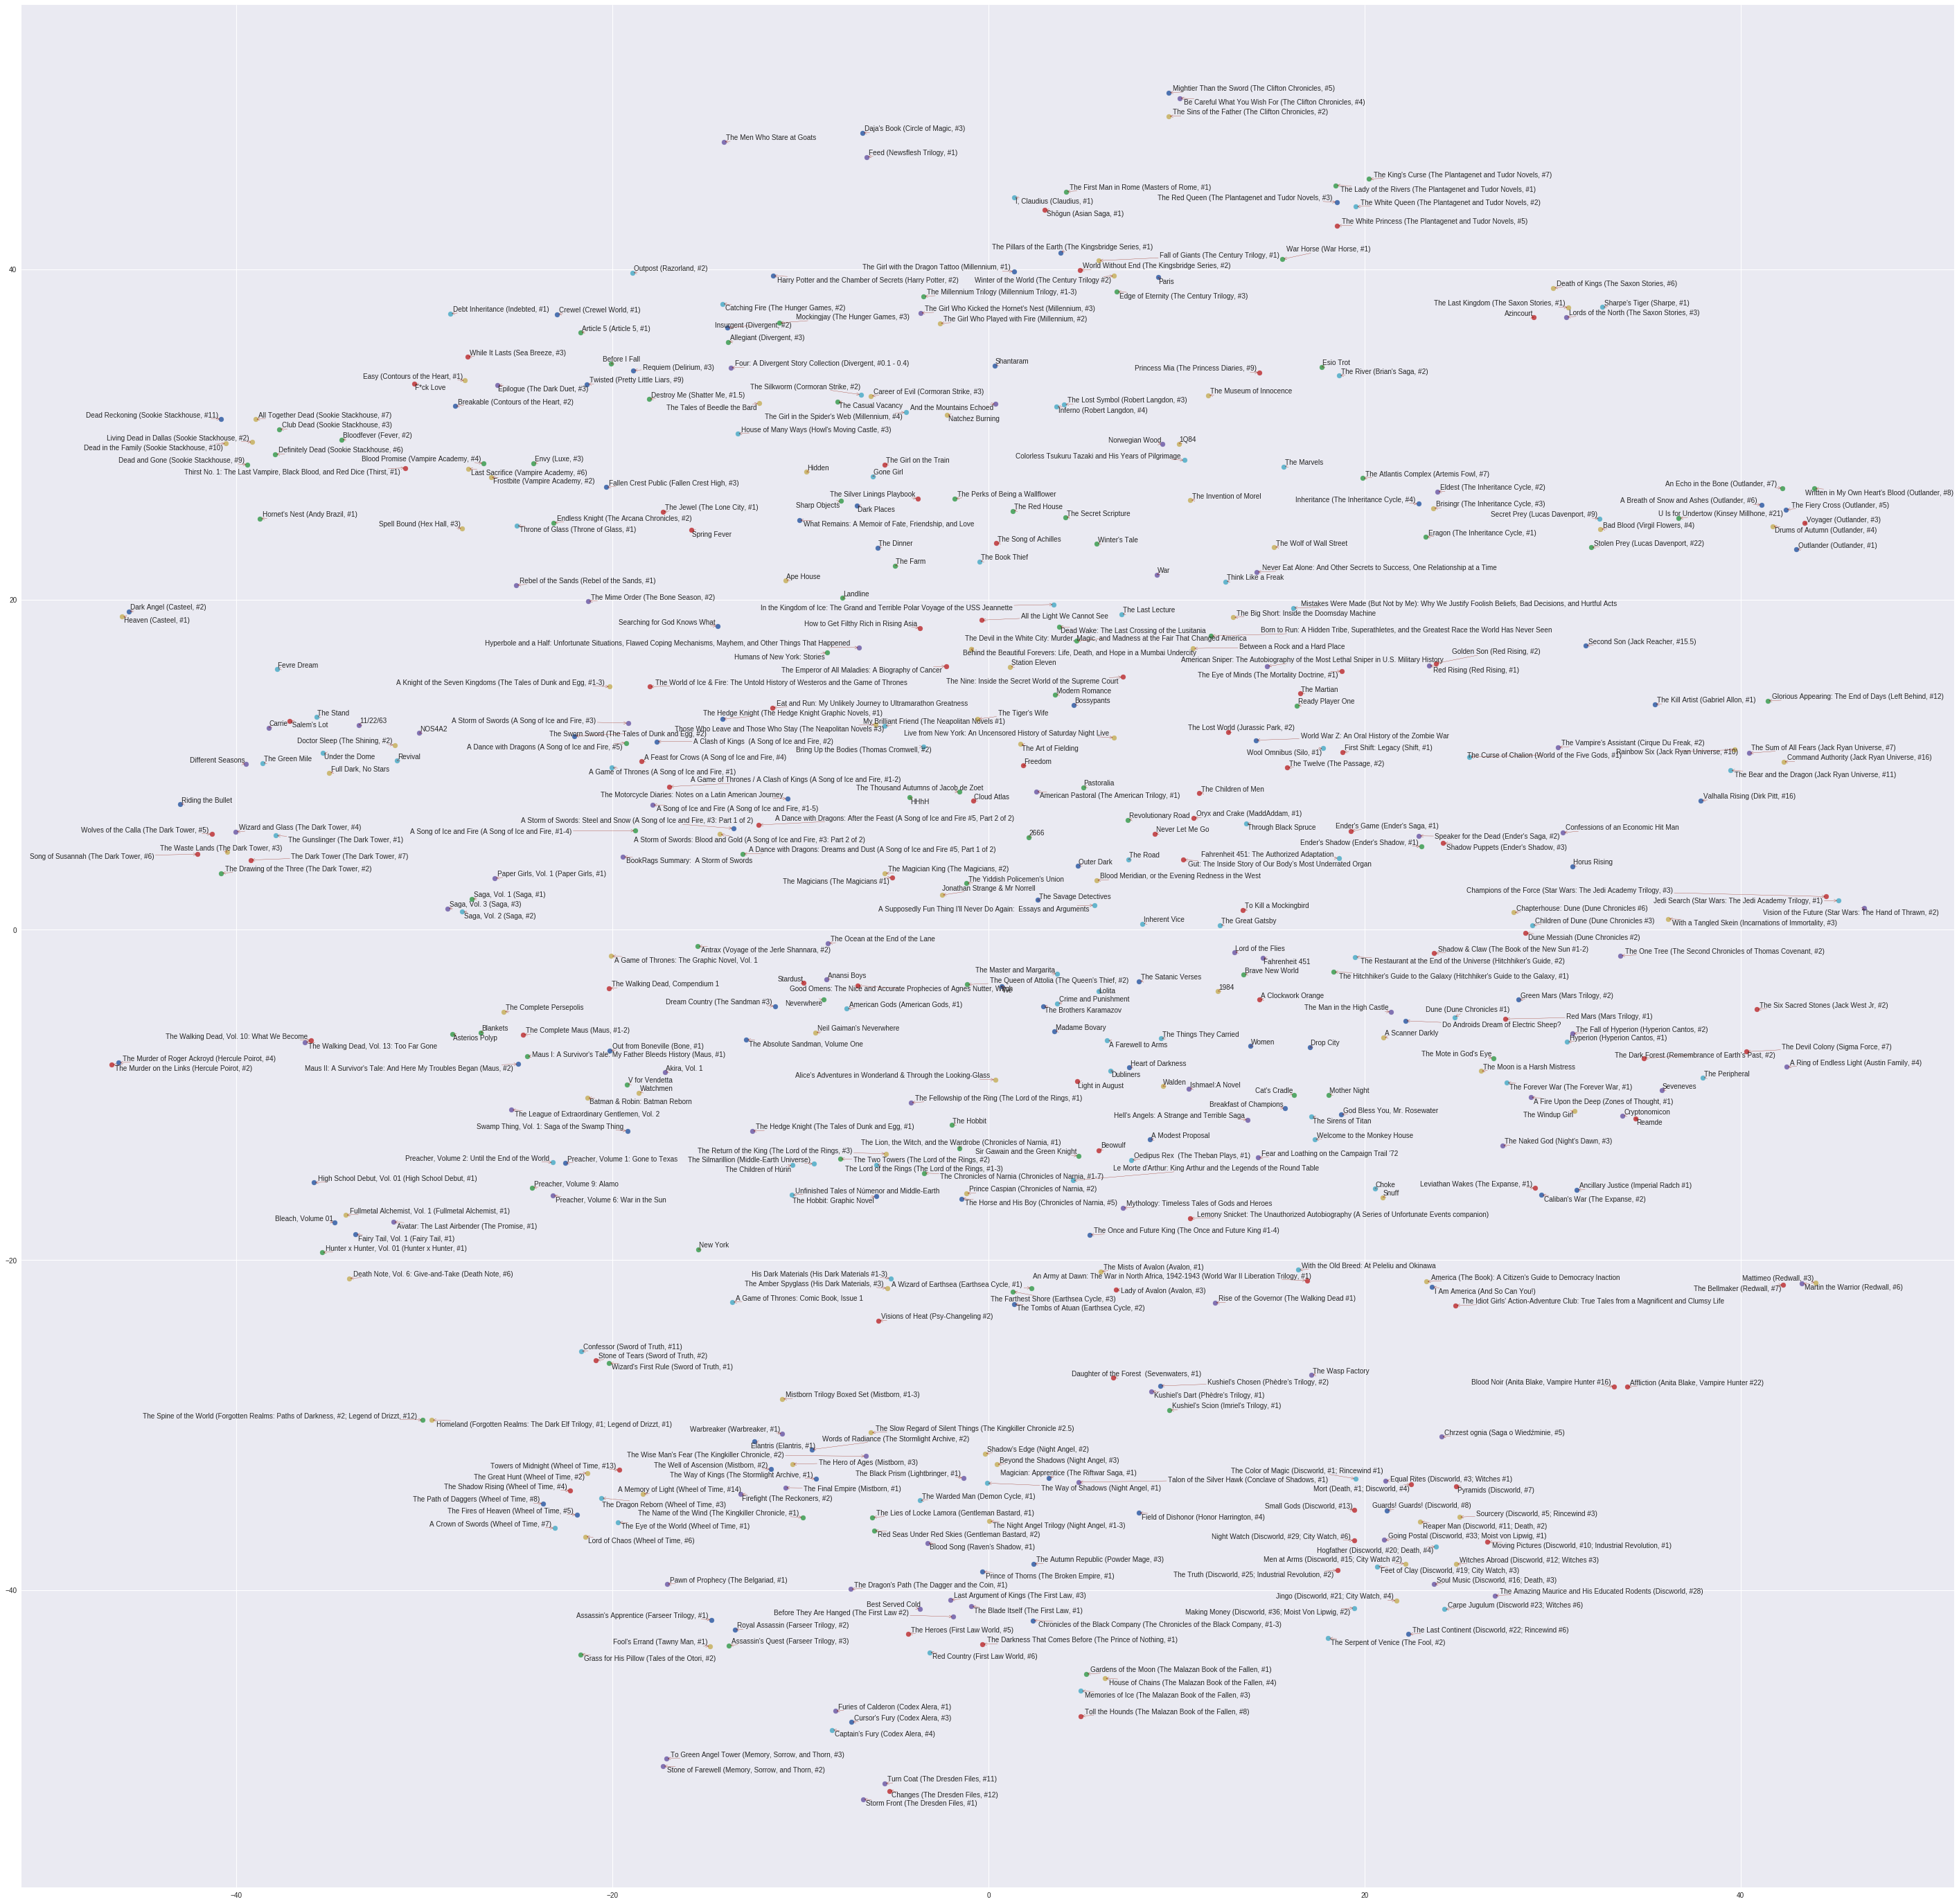

In [28]:
from adjustText import adjust_text
import numpy as np
import pandas as pd

texts = []

def plot(embeddings, labels):
  assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
  pyplot.figure(figsize=(50, 50))  # in inches
  for i, label in enumerate(labels):
    x, y = embeddings[i,:]
    pyplot.scatter(x, y)
    texts.append(pyplot.text(x, y, label))
  
  adjust_text(texts , arrowprops=dict(arrowstyle='->', color='#8f1402' ) ) 
#   pyplot.savefig('ClashKings.png', bbox_inches='tight')
#   uploadModel = drive.CreateFile()
#   uploadModel.SetContentFile('ClashKings.png')
#   uploadModel.Upload()
  
#   pyplot.savefig('ClashKings.jpg', bbox_inches='tight')
#   uploadModel = drive.CreateFile()
#   uploadModel.SetContentFile('ClashKings.jpg')
#   uploadModel.Upload()
  pyplot.show()


books = [bookDictionary[i] for i in nearestBooks]
plot(two_d_embeddings, books)
